# Price Optimization Analysis for AirBnB: Data Exploration and Analysis

## Business Objective - To create a pricing strategy for Airbnb, which helps Airbnb hosts set the right price for their Airbnb listing and provides customers the benefit of cost.

### Libraries Implemented

In [1]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Seaborn and Matplotlib packages as well for Viz. 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Load Data in CVS File: Import data files into dataframe.

In [2]:
# Read application data file into dataframe
bnb=pd.read_csv("AB_NYC_2019.csv")
bnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Check the structure of df DataFrame

In [3]:
# Shape of dataframe
bnb.shape

(48895, 16)

In [4]:
# Datatypes of dataframe
bnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
# Quick review to the statistics matrixes of df dataframe
bnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Data Cleaning

Missing Data Handling: Finding the percentage of missing values for all the columns.

In [7]:
# Analyze columns for missing values in df
bnb_null_percentages = bnb.isnull().mean()*100

# Round off to 2 decimal places
bnb_null_percentages = bnb_null_percentages.round(2)

# Sort in ascending order
bnb_null_percentages = bnb_null_percentages.sort_values(ascending=False)
bnb_null_percentages




last_review                       20.56
reviews_per_month                 20.56
host_name                          0.04
name                               0.03
id                                 0.00
host_id                            0.00
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

- `last_review`: It has 20.56% missing values.
- `reviews_per_month`: It also has 20.56% missing values.
- `host_name`: It has only 0.04% missing values.
- `name`: It has only 0.03% missing values

In [8]:
# There are columns that do not provide any analytical value and hence we will remove it

columns_to_remove = bnb.columns[bnb.columns.str.startswith(('id', 'host_id', 'host_name', 'name', 'latitude', 'longitude', 'calculated_host_listings_count'))]

# Drop the identicalfied columns from the clean Dateframe and create a new DataFrame 
bnb = bnb.drop(columns=columns_to_remove)
bnb.shape

(48895, 9)

In [9]:
# Drop duplicate data from Dataframeframe, if any

bnb = bnb.drop_duplicates()
bnb.shape

(47825, 9)

There are no duplicate Values in the DataFrame "bnb_clean"

In [10]:
# Filling all null values in column name with N/A
bnb.fillna({'name':'N/A'},inplace = True)

#Filling all the null values in column reviews_per_month and last_reveiw with 0
bnb.fillna({'reviews_per_month':0,'last_review':0},inplace = True)
bnb

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,355
2,Manhattan,Harlem,Private room,150,3,0,0,0.00,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,0,0.00,9
48891,Brooklyn,Bushwick,Private room,40,4,0,0,0.00,36
48892,Manhattan,Harlem,Entire home/apt,115,10,0,0,0.00,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,0,0.00,2


In [11]:
# Lets check again for missing values percentages 
bnb_null_percentages = bnb.isnull().mean()*100

# Round off to 2 decimal places
bnb_null_percentages = bnb_null_percentages.round(2)

# Sort in ascending order 
bnb_null_percentages= bnb_null_percentages.sort_values(ascending=False)
bnb_null_percentages



neighbourhood_group    0.0
neighbourhood          0.0
room_type              0.0
price                  0.0
minimum_nights         0.0
number_of_reviews      0.0
last_review            0.0
reviews_per_month      0.0
availability_365       0.0
dtype: float64

There are no more missing values

In [12]:
# Convert the 'last_review' column to datetime
bnb['last_review'] = pd.to_datetime(bnb['last_review'],errors = 'coerce')

# Verify the data type conversion
bnb['last_review'].dtypes


dtype('<M8[ns]')

Dropping Unecessary Rows

In [13]:
# There are rows that do not provide any analytical value and hence we will remove it

#drop all rows with availability_365 less than 1
availability_365_droprows = bnb[bnb['availability_365']<1].index
bnb.drop(index = availability_365_droprows, inplace = True)
         
#drop all rows with minimum nights more than 365
min_nights_droprows = bnb[bnb['minimum_nights']>365].index
bnb.drop(index = min_nights_droprows, inplace = True)

# Drop all rows with price equal to 0
price_droprows = bnb[bnb['price'] == 0].index
bnb.drop(index=price_droprows, inplace=True)
         
bnb.shape

(31160, 9)

In [14]:
# Create new DataFrame after cleaning
bnb_clean = bnb.copy()
bnb_clean


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,355
2,Manhattan,Harlem,Private room,150,3,0,NaT,0.00,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,194
5,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06-22,0.59,129
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaT,0.00,9
48891,Brooklyn,Bushwick,Private room,40,4,0,NaT,0.00,36
48892,Manhattan,Harlem,Entire home/apt,115,10,0,NaT,0.00,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaT,0.00,2


In [15]:
# Casting all variable into numeric in the dataset

num_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
bnb_clean[num_cols]=bnb_clean[num_cols].apply(pd.to_numeric,errors='coerce')
bnb_clean.head(5)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,355
2,Manhattan,Harlem,Private room,150,3,0,NaT,0.00,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,194
5,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06-22,0.59,129


### Checking Data Quality

In [16]:
# Analyze and Standarizing the Datatypes and Values
# Here we are going to analyis and observe every column, datatype and their unique values.
# The purpose of this is to analyis various types of variables like Numerical, Catagorial Variables.
# To achive this, I'm creating below for loop to walk through all the columns and print their datatype, unique values 
# and count of unique values. 

for col in bnb_clean.columns:
    uniq_val = bnb_clean[col].unique()
    col_dtype = bnb_clean[col].dtypes
    print('Column Name\t\t:{}\nDatatype\t\t:{}\nUnique Values Count\t:{}\nUnique Values\t\t:{}'.format(col,col_dtype,len(uniq_val),uniq_val))
    print('='*100)

Column Name		:neighbourhood_group
Datatype		:object
Unique Values Count	:5
Unique Values		:['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Column Name		:neighbourhood
Datatype		:object
Unique Values Count	:218
Unique Values		:['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'Murray Hill'
 "Hell's Kitchen" 'Chinatown' 'Upper West Side' 'South Slope'
 'Williamsburg' 'Fort Greene' 'Chelsea' 'Crown Heights' 'East Harlem'
 'Park Slope' 'Bedford-Stuyvesant' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'West Village' 'Gowanus' 'Flatlands'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Ridgewood' 'Morningside Heights' 'Jamaica' 'Middle Village' 'NoHo'
 'Ditmars Steinway' 'Cobble Hill' 'Flatiron District' 'Roosevelt Island'
 'Greenwich Vi

### Outliers Detection in bnb_clean

In [17]:
# List of numerical columns in bnb_clean
numcols = bnb_clean.select_dtypes(include='number').columns.tolist()
numcols

['price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'availability_365']

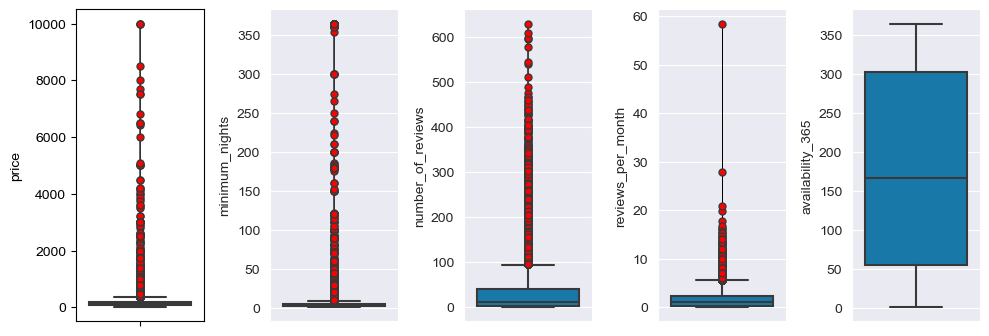

In [18]:
# Determine outliers using boxplot for quantitative variables - bnb_clean dataframe.
# Number of numerical columns

ln=len(numcols)

# calculation for subplots
n=5
m=(ln//n)+5
ct=1

# Setting figure size
plt.figure(1,figsize=(10,20))

# Running in loop to plot all columns as subplot
for column in numcols:
    if bnb_clean[column].nunique() > 2:
        plt.subplot(m,n,ct)
        flierprops = dict(marker='o',markerfacecolor='red', markersize=5,linewidth=0.5,
                      linestyle='-')

        data = bnb_clean[column]
        sns.set_style("darkgrid")
        sns.boxplot(y=data, palette="winter", flierprops=flierprops)

        ct+=1

# Show graphs
plt.tight_layout()
plt.show()


Among the variables in the "bnb_clean" dataset, the following variables have prominent outliers denoted in red:
    
    price, minimum_nights, numbers_of_reveiws, reviews_months, 

In [19]:
# Quick review of stats for outlier columns from bnb_clean

outlier_list = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']
bnb_clean[outlier_list].describe(percentiles=[.25,.50,.75,.95])

,price,minimum_nights,number_of_reviews,reviews_per_month
count,31160.000000,31160.000000,31160.000000,31160.000000
mean,161.843164,7.967073,32.045154,1.518709
std,254.872738,18.304602,51.738732,1.782833
min,10.000000,1.000000,0.000000,0.000000
25%,70.000000,2.000000,2.000000,0.180000
50%,110.500000,3.000000,10.000000,0.930000
75%,189.000000,5.000000,39.000000,2.350000
95%,399.000000,30.000000,138.000000,4.910000
max,10000.000000,365.000000,629.000000,58.500000


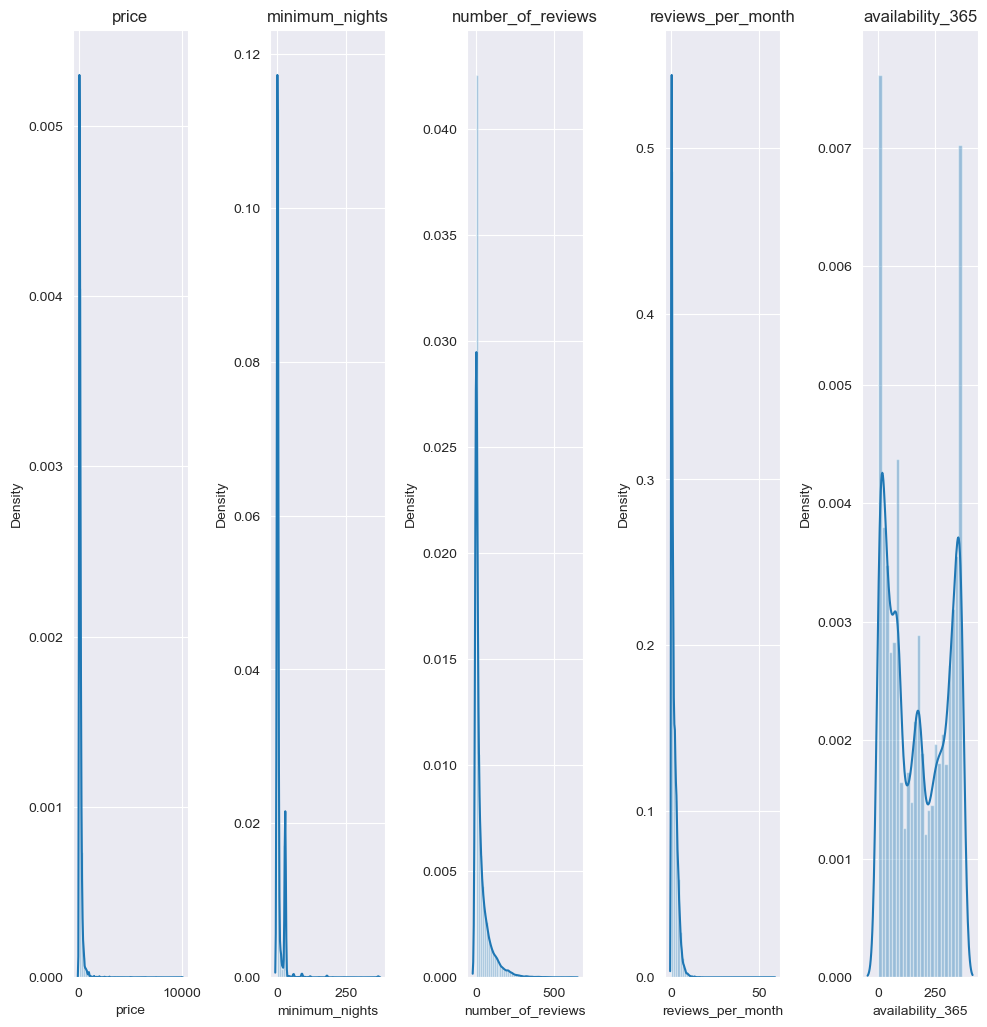

In [20]:
# Using histogram for quantitative variables - bnb_clean

# Number of numerical columns
ln = len(numcols)

# Calculation for subplots
n = 5
m = (ln // n) + 1

# Setting figure size
fig, axes = plt.subplots(m, n, figsize=(10, 20))

# Running in loop to plot all columns as subplot
for i, column in enumerate(numcols):
    row = i // n
    col = i % n

    # Plot histogram
    data = bnb_clean[column]
    sns.distplot(data.dropna(), ax=axes[row, col], hist=True)
    axes[row, col].set_title(column)

# Removing empty subplots
if ln < m * n:
    for i in range(ln, m * n):
        row = i // n
        col = i % n
        fig.delaxes(axes[row, col])

# Show graphs
plt.tight_layout()
plt.show()



### Remove Outliers from bnb_clean

Remove outliers from bnb_clean dataframe as it produces incorrect metric and graphs. Use below logic to determine outliers.

Calculate Inter Quantile Region (75th Percentile - 25th Percentile) 
Upper cutoff = 75th percentile + 1.5 * (IQR) 
Lower cutoff = 25th percentile - 1.5 * (IQR) 


In [21]:
# Remove Outliers from application_clean

# Calculate Inter Quantile Region (75th Percentile - 25th Percentile)
# Upper cutoff = 75th percentile + 1.5 * (IQR)
# Lower cutoff = 25th percentile - 1.5 * (IQR)

def removeoutlier(bnb_clean,col):

    col_q1,col_q3,_col_IQR,lower_cutoff,upper_cutoff = 0,0,0,0,0
    data=pd.DataFrame()
    outlier_data=pd.DataFrame()
    data=bnb_clean[col]

    col_q1 = data.quantile(q=.25)
    col_q3 = data.quantile(q=.75)
    col_IQR = col_q3 - col_q1
    lower_cutoff = col_q1 - (1.5 * col_IQR)
    upper_cutoff = col_q3 + (1.5 * col_IQR)
    mask1 = (bnb_clean[col] > lower_cutoff) & (bnb_clean[col] < upper_cutoff)
    mask2 = (bnb_clean[col].isnull()==True)
# print(col,lower_cutoff,upper_cutoff)
    if(lower_cutoff==0) | (upper_cutoff==0) | (lower_cutoff == upper_cutoff):
        return bnb_clean
        pass
    else:
        bnb_clean = bnb_clean.loc[mask1 | mask2]
        return bnb_clean

for column in outlier_list:
        bnb_clean = removeoutlier(bnb_clean,column)
        


In [22]:
# Review of df_clean dataframe after removing outliers

bnb_clean.describe()

,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
count,21458.000000,21458.000000,21458.000000,18808,21458.000000,21458.000000
mean,125.667863,2.617998,24.588219,2019-04-05 20:24:33.075287040,1.443818,159.006152
min,10.000000,1.000000,0.000000,2011-04-25 00:00:00,0.000000,1.000000
25%,68.000000,1.000000,3.000000,2019-05-12 00:00:00,0.320000,42.000000
50%,100.000000,2.000000,12.000000,2019-06-16 00:00:00,1.000000,132.000000
75%,169.000000,3.000000,37.000000,2019-06-29 00:00:00,2.260000,281.000000
max,367.000000,9.000000,122.000000,2019-07-08 00:00:00,5.550000,365.000000
std,74.754165,1.642087,29.361030,NaN,1.347785,125.335410


### Data Exploration: Univariate Analysis on Categorical Variables

In [23]:
# Take out categorical variables from bnb-clean 

# List Categorical Variables from df_clean

cat_cols = bnb_clean.select_dtypes(include=['object']).columns.tolist()
cat_cols



['neighbourhood_group', 'neighbourhood', 'room_type']

In [81]:
neigh_grp_bnb_clean = bnb_clean['neighbourhood_group'].value_counts().sort_values()
neigh_grp_bnb_clean

neighbourhood_group
Staten Island     277
Bronx             776
Queens           3352
Manhattan        7952
Brooklyn         9101
Name: count, dtype: int64

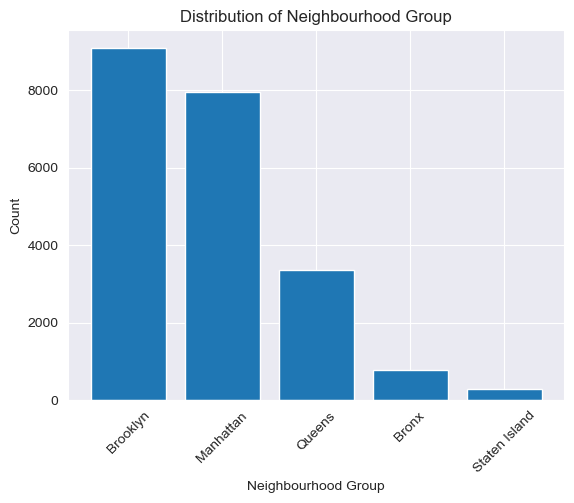

In [79]:
# Barplot for these categorical variables - Neighbourhood Group

# Count the frequency of each category
category_counts = bnb_clean['neighbourhood_group'].value_counts()

# Create a bar plot
plt.bar(category_counts.index, category_counts.values)

# Add labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Distribution of Neighbourhood Group')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()




Brooklyn has the highest share of Airbnbs with 9101 in New York followed by Manhattan with 7952.

In [25]:
# Statistic of neighborhoods with high mean value

bnb_clean_stat_neighborhood = bnb_clean.groupby(['neighbourhood'])['price'].describe().reset_index()
bnb_clean_stat_neighborhood = bnb_clean_stat_neighborhood.sort_values(by=['mean'], ascending=False)
top_twenty_neighborhood_mean = bnb_clean_stat_neighborhood.head(20)
bnb_clean_stat_neighborhood

,neighbourhood,count,mean,std,min,25%,50%,75%,max
137,Neponsit,3.0,274.666667,75.002222,200.0,237.00,274.0,312.00,350.0
211,Willowbrook,1.0,249.000000,NaN,249.0,249.00,249.0,249.00,249.0
193,Tribeca,41.0,241.073171,76.749720,80.0,170.00,240.0,300.00,359.0
141,NoHo,29.0,218.620690,65.625242,80.0,179.00,208.0,250.00,352.0
74,Flatiron District,24.0,217.375000,76.780213,95.0,168.00,221.0,271.25,350.0
20,Breezy Point,3.0,213.333333,31.754265,195.0,195.00,195.0,222.50,250.0
52,DUMBO,7.0,211.285714,76.178987,125.0,155.00,219.0,237.50,350.0
90,Greenwich Village,126.0,208.912698,72.409062,43.0,151.75,200.0,250.00,350.0
72,Financial District,282.0,207.067376,58.332637,57.0,169.00,217.5,236.00,365.0
205,West Village,244.0,206.565574,66.633571,50.0,159.00,200.0,250.00,350.0


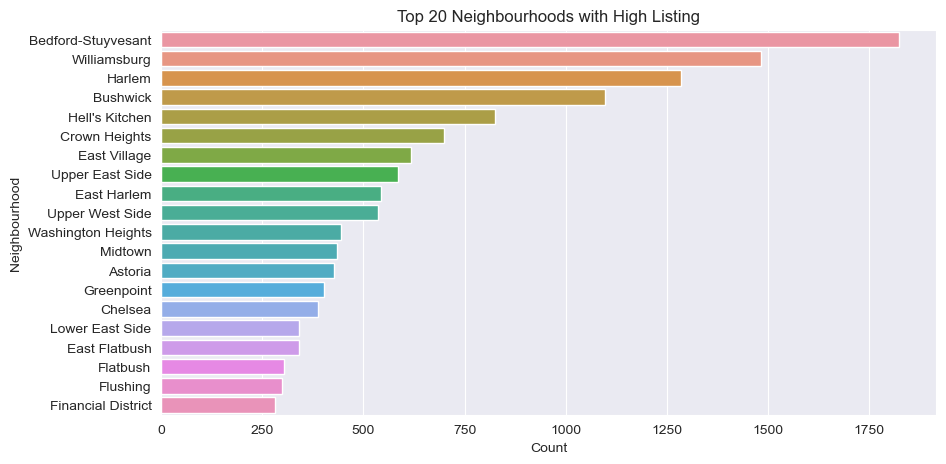

In [26]:
# Barplot for categorical variables -  Top 20 Neighbourhoos with High Listing 

fig, ax = plt.subplots(figsize=(10, 5))
bnb_clean_stat_neighborhood = bnb_clean_stat_neighborhood.sort_values(by=['count'], ascending=False)
sns.barplot(x="count", y="neighbourhood", data=bnb_clean_stat_neighborhood[0:20], ax=ax)

# Set labels and title
ax.set(xlabel='Count', ylabel='Neighbourhood')
ax.set_title('Top 20 Neighbourhoods with High Listing')
plt.show()


In [27]:
# Top 20 neighborhood with high listing statistic

bnb_clean_stat_neighborhood[0:20]

,neighbourhood,count,mean,std,min,25%,50%,75%,max
12,Bedford-Stuyvesant,1825.0,104.885479,60.054384,21.0,60.00,89.0,140.00,365.0
210,Williamsburg,1482.0,141.374494,75.888610,10.0,80.00,120.0,190.00,365.0
92,Harlem,1285.0,113.065370,63.977133,16.0,69.00,90.0,148.00,360.0
27,Bushwick,1098.0,90.245902,54.767892,11.0,55.00,70.0,109.75,350.0
93,Hell's Kitchen,826.0,171.096852,74.762576,15.0,109.00,165.0,219.00,367.0
50,Crown Heights,700.0,113.022857,67.942747,24.0,65.00,99.0,148.25,360.0
63,East Village,618.0,164.289644,72.024568,40.0,100.25,150.0,205.75,365.0
197,Upper East Side,586.0,160.085324,68.105847,16.0,109.00,150.0,200.00,365.0
60,East Harlem,544.0,126.042279,69.434496,35.0,77.00,100.0,150.00,359.0
198,Upper West Side,536.0,170.089552,80.046572,11.0,100.00,150.0,225.00,360.0


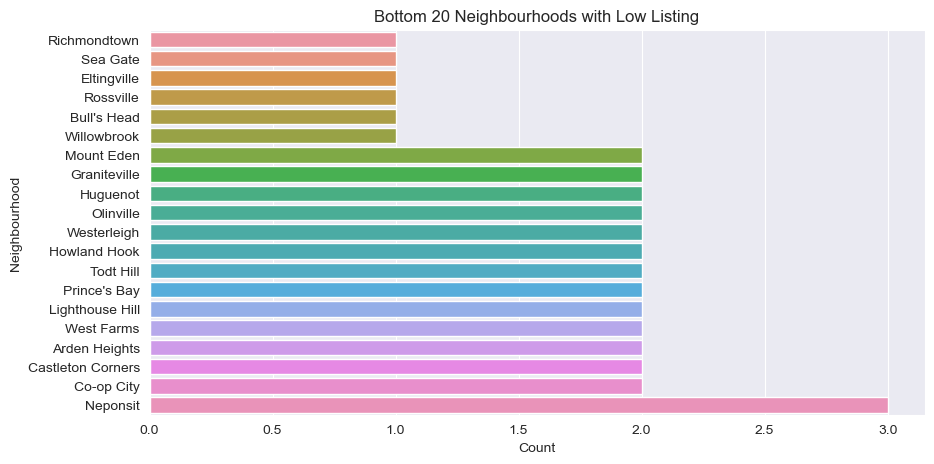

In [67]:
# Barplot for categorical variables -  Botoom 20 Neighbourhoos with Low Listing 

fig, ax = plt.subplots(figsize=(10, 5))
bnb_clean_stat_neighborhood = bnb_clean_stat_neighborhood.sort_values(by=['count'], ascending=True)
sns.barplot(x="count", y="neighbourhood", data=bnb_clean_stat_neighborhood[:20], ax=ax)      
ax.set(xlabel='Count', ylabel='Neighbourhood')
ax.set_title('Bottom 20 Neighbourhoods with Low Listing')
plt.show()


In [69]:
# Bottom 20 neighborhood with low listing statistic

bnb_clean_stat_neighborhood[-20:]

,neighbourhood,count,mean,std,min,25%,50%,75%,max
137,Neponsit,3.0,274.666667,75.002222,200.0,237.00,274.0,312.00,350.0
189,Todt Hill,2.0,92.500000,60.104076,50.0,71.25,92.5,113.75,135.0
133,Mount Eden,2.0,49.000000,8.485281,43.0,46.00,49.0,52.00,55.0
85,Graniteville,2.0,67.500000,67.175144,20.0,43.75,67.5,91.25,115.0
99,Huguenot,2.0,87.500000,17.677670,75.0,81.25,87.5,93.75,100.0
146,Olinville,2.0,53.000000,38.183766,26.0,39.50,53.0,66.50,80.0
207,Westerleigh,2.0,71.500000,44.547727,40.0,55.75,71.5,87.25,103.0
98,Howland Hook,2.0,100.000000,0.000000,100.0,100.00,100.0,100.00,100.0
1,Arden Heights,2.0,72.500000,3.535534,70.0,71.25,72.5,73.75,75.0
154,Prince's Bay,2.0,101.500000,23.334524,85.0,93.25,101.5,109.75,118.0


The listing data reveals that even in neighborhoods with higher rental prices, there is still a significant demand for rental properties. This suggests that despite the higher costs, people are willing to pay for the desirable features, amenities, or location offered by these neighborhoods. On the other hand, neighborhoods with lower rental prices may indicate a comparatively lower demand. However, it's important to note that price alone may not be the sole determining factor for demand, as other factors such as proximity to amenities, transportation accessibility, and neighborhood reputation can also play a role.

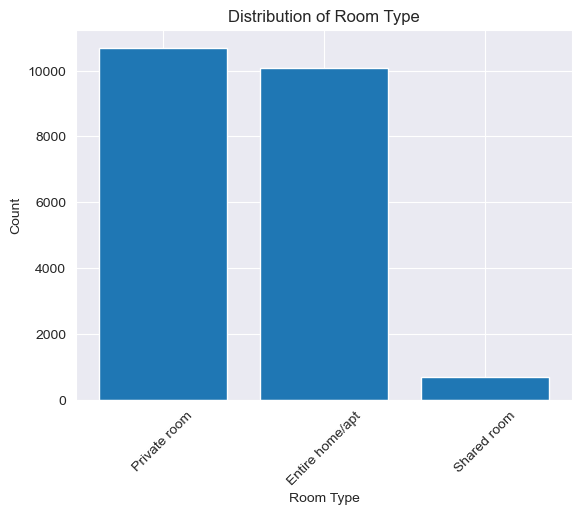

In [70]:
# Barplot for categorical variables - Room Type


# Count the frequency of each category
category_counts = bnb_clean['room_type'].value_counts()

# Create a bar plot
plt.bar(category_counts.index, category_counts.values)

# Add labels and title
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Distribution of Room Type')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

It shows that the most common room type are private room and entire home/apt

### Correlation Between Numerical Variables

In [71]:
#Finding Correlation for Numerical columns 

bnb_numeric = bnb[num_cols]

# Calculate the correlation matrix using the .corr() method.

corr_matrix = bnb_numeric.corr()

corr_matrix


,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
price,1.000000,0.051177,-0.072468,-0.082053,0.074018
minimum_nights,0.051177,1.000000,-0.140896,-0.221060,0.144778
number_of_reviews,-0.072468,-0.140896,1.000000,0.537240,0.013936
reviews_per_month,-0.082053,-0.221060,0.537240,1.000000,-0.083926
availability_365,0.074018,0.144778,0.013936,-0.083926,1.000000


<Axes: >

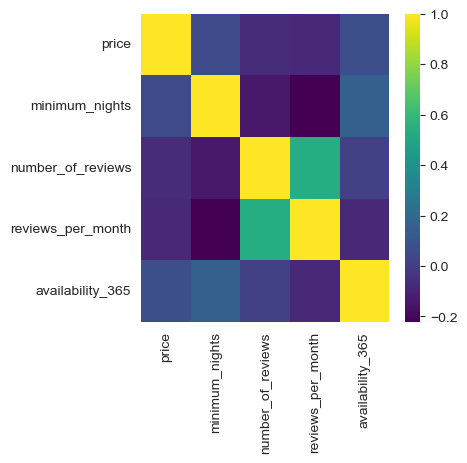

In [72]:
# Correlation for key quantitative variables from bnb_clean  

plt.figure(6,figsize=(4,4))

columns_to_impute_corr=bnb[num_cols].corr()

sns.heatmap(columns_to_impute_corr ,xticklabels=True, yticklabels=True,cmap="viridis")

Based on the correlation matrix, here are some insights:

1. Price has a weak positive correlation with availability_365 (correlation coefficient = 0.074490). This suggests that as the availability of Listening increases throughout the year, the prices tend to slightly increase as well.

2. Minimum_nights has a weak positive correlation with availability_365 (correlation coefficient = 0.148687). This indicates that as the availability of listings throughout the year increases, the minimum number of nights required for booking also tends to increase slightly.

3. Number_of_reviews has a weak negative correlation with price (correlation coefficient = -0.072886). This implies that as the number of reviews for a listing increases, the price tends to slightly decrease.

4. Reviews_per_month has a weak negative correlation with price (correlation coefficient = -0.082590). This indicates that as the number of reviews per month for a listing increases, the price tends to slightly decrease as well.

Since this analysis focuses on the price, it is important to examine the relationships between price and other features. Additionally, it appears that the number of reviews does not have a positive impact on price.

To further understand this relationship, conducting sentiment analysis on the reviews can help determine whether the reviews are generally positive or if there are numerous complaints.

It's important to note that these correlations represent the linear relationship between the variables and do not imply causation. Additionally, the strength of the correlations is considered weak, as the correlation coefficients are close to 0.

### Bivariate Analysis on bnb_clean DataFrame:

#### What is the average availabilty(days) in top-20 neighbourhoods?



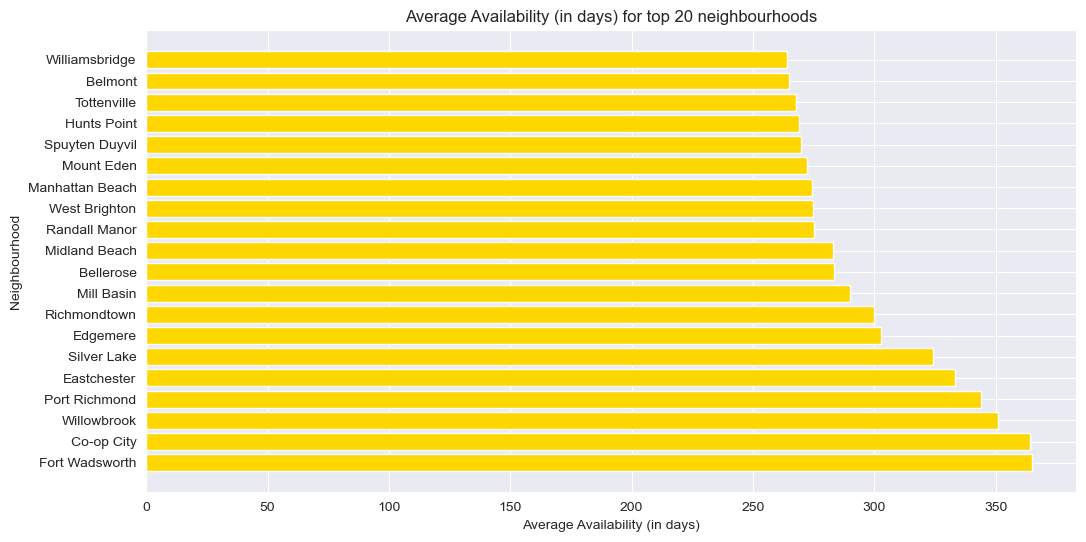

In [73]:
# Calculate the average availability for each neighbourhood
avg_availability = bnb.groupby('neighbourhood')['availability_365'].mean().sort_values(ascending=False)[:20]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.barh(avg_availability.index, avg_availability.values, color='gold')

# Set the title and axis labels
plt.title('Average Availability (in days) for top 20 neighbourhoods')
plt.xlabel('Average Availability (in days)')
plt.ylabel('Neighbourhood')

# Display the plot
plt.show()



It shows above figure that airbnb in the neighbourhood Fort Wadsworth is available throughout the year i.e,365 days.

#### Is there a relation between number of reviews and prices?

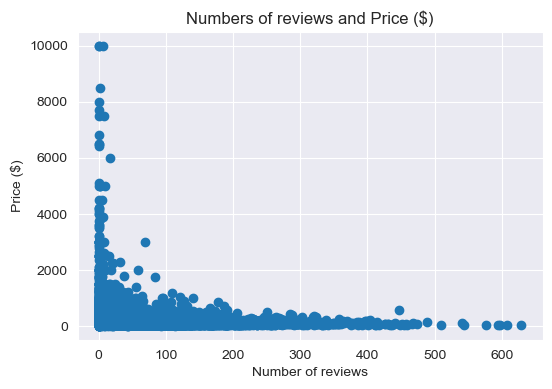

In [74]:
plt.figure(figsize = (6,4))
plt.scatter(bnb['number_of_reviews'],bnb['price'])
plt.title('Numbers of reviews and Price ($)')
plt.xlabel('Number of reviews')
plt.ylabel('Price ($)')
plt.show()



From the scarter plot above, it is clear that higher the price lower the number of reviews.

#### How does the neighborhood have impact on price?

Among the listed neighborhoods, it is interesting to observe the price range for private room and entirehouse/apartment, which appear to be the most rented type of room.

In [75]:
bnb_clean_stat_room_type = bnb_clean.groupby(['neighbourhood', 'neighbourhood_group', 'room_type'])['price'].describe().reset_index()
bnb_clean_stat_room_type = bnb_clean_stat_room_type[bnb_clean_stat_room_type['room_type'].isin(['Private room','Entire home/apt','Shared room'])]
bnb_clean_stat_room_type = bnb_clean_stat_room_type.sort_values(by=['max'], ascending=False)
bnb_clean_stat_room_type

,neighbourhood,neighbourhood_group,room_type,count,mean,std,min,25%,50%,75%,max
225,Hell's Kitchen,Manhattan,Entire home/apt,419.0,217.033413,62.988902,15.0,175.0,200.0,259.50,367.0
76,Chelsea,Manhattan,Entire home/apt,263.0,219.262357,64.213709,69.0,175.0,215.0,255.50,365.0
466,Upper East Side,Manhattan,Entire home/apt,369.0,188.517615,61.946947,16.0,145.0,180.0,225.00,365.0
150,East Village,Manhattan,Entire home/apt,387.0,196.793282,66.137701,59.0,149.5,190.0,242.00,365.0
171,Financial District,Manhattan,Entire home/apt,208.0,224.567308,44.837929,75.0,201.0,228.0,241.25,365.0
...,...,...,...,...,...,...,...,...,...,...,...
181,Flatlands,Brooklyn,Shared room,1.0,22.000000,NaN,22.0,22.0,22.0,22.00,22.0
406,Schuylerville,Bronx,Shared room,1.0,20.000000,NaN,20.0,20.0,20.0,20.00,20.0
361,Pelham Gardens,Bronx,Shared room,1.0,20.000000,NaN,20.0,20.0,20.0,20.00,20.0
207,Graniteville,Staten Island,Private room,1.0,20.000000,NaN,20.0,20.0,20.0,20.00,20.0


In [76]:
ten_expensive_neighborhood_mean = bnb_clean.groupby('neighbourhood')['price'].mean().nlargest(10).reset_index()
most_expensive_neighbourhoods_names = list(ten_expensive_neighborhood_mean['neighbourhood'])
most_expensive_neighbourhoods_names

['Neponsit',
 'Willowbrook',
 'Tribeca',
 'NoHo',
 'Flatiron District',
 'Breezy Point',
 'DUMBO',
 'Greenwich Village',
 'Financial District',
 'West Village']

In [77]:
# statistic for Private room, Entire home/apt and Shared room for most expensive areas
bnb_clean_stat_room_type = bnb_clean_stat_room_type[bnb_clean_stat_room_type['neighbourhood'].isin(most_expensive_neighbourhoods_names)] 
bnb_clean_stat_room_type

,neighbourhood,neighbourhood_group,room_type,count,mean,std,min,25%,50%,75%,max
171,Financial District,Manhattan,Entire home/apt,208.0,224.567308,44.837929,75.0,201.00,228.0,241.25,365.0
458,Tribeca,Manhattan,Entire home/apt,30.0,267.533333,66.251211,140.0,221.25,277.5,323.75,359.0
334,NoHo,Manhattan,Entire home/apt,25.0,225.080000,60.044372,106.0,179.00,225.0,250.00,352.0
327,Neponsit,Queens,Entire home/apt,3.0,274.666667,75.002222,200.0,237.00,274.0,312.00,350.0
218,Greenwich Village,Manhattan,Entire home/apt,96.0,235.343750,57.566589,89.0,200.00,225.0,281.50,350.0
177,Flatiron District,Manhattan,Entire home/apt,18.0,248.222222,60.537354,100.0,218.75,225.0,296.75,350.0
123,DUMBO,Brooklyn,Entire home/apt,4.0,236.000000,83.270643,150.0,201.75,222.0,256.25,350.0
486,West Village,Manhattan,Entire home/apt,202.0,221.920792,58.919404,85.0,179.00,220.0,258.75,350.0
172,Financial District,Manhattan,Private room,69.0,158.173913,62.518458,57.0,105.00,150.0,200.00,300.0
173,Financial District,Manhattan,Shared room,5.0,153.800000,88.570311,65.0,105.00,150.0,150.00,299.0


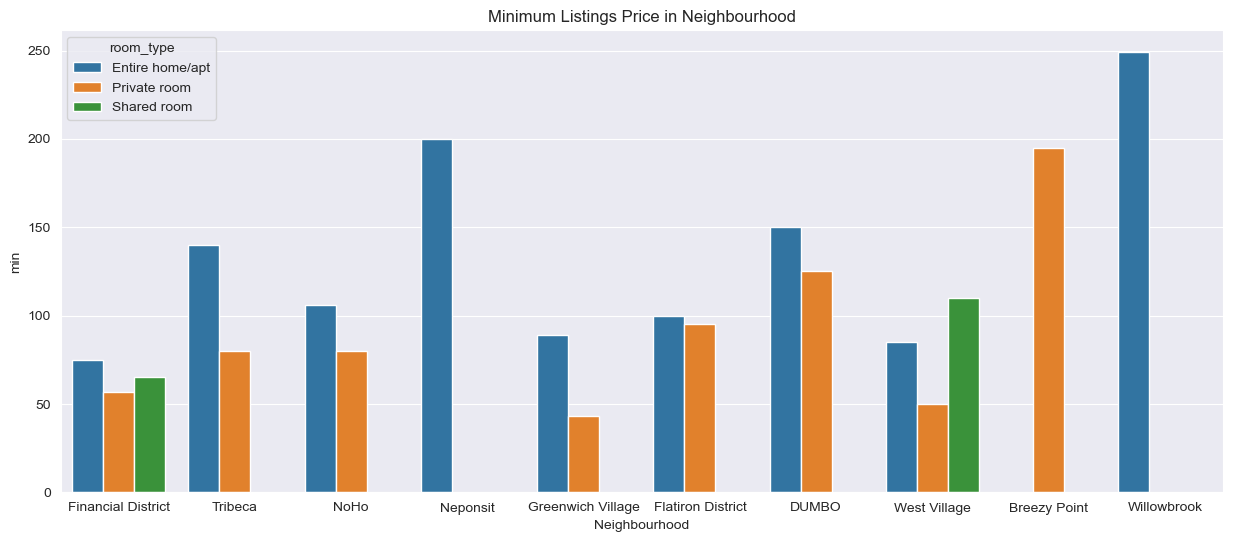

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(x="neighbourhood", y="min", hue="room_type", data=bnb_clean_stat_room_type, ax=ax)
plt.xlabel('Neighbourhood')
plt.title('Minimum Listings Price in Neighbourhood')
plt.show()


The figures demonstrate that on average, the maximum prices for Entire home/apt listings are higher than those for Private room and Shared room listings. This suggests that renting an entire home or apartment tends to be more expensive than renting just a private room or a shared room.

However, there are some areas where the starting price for Private room listings is higher than that for Entire home/apt listings. This indicates that in certain neighborhoods, renting a private room may be more expensive than renting an entire home or apartment. This could be due to factors such as location, amenities, or the overall demand for private rooms in those areas.

It is also worth noting that West Village has the highest maximum price for Shared room listings, which suggests that in that specific neighborhood, shared accommodations can be relatively expensive compared to other neighborhoods.

These observations highlight the variation in pricing across different room types and neighborhoods, indicating the influence of various factors on rental prices in each area.

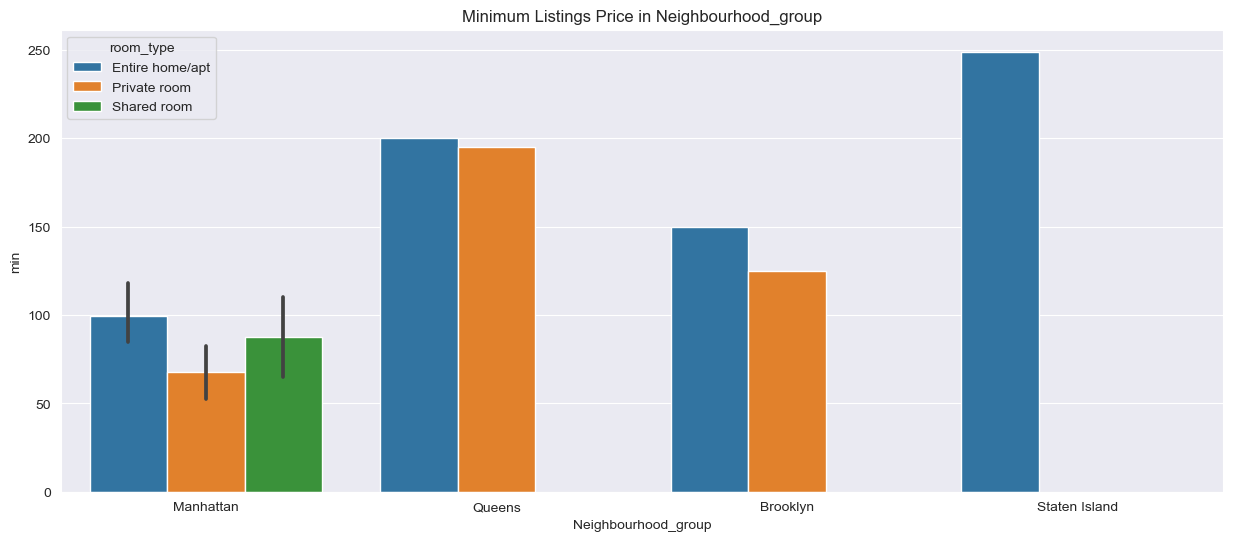

In [39]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(x="neighbourhood_group", y="min", hue="room_type", data=bnb_clean_stat_room_type, ax=ax)
plt.xlabel('Neighbourhood_group')
plt.title('Minimum Listings Price in Neighbourhood_group')
plt.show()

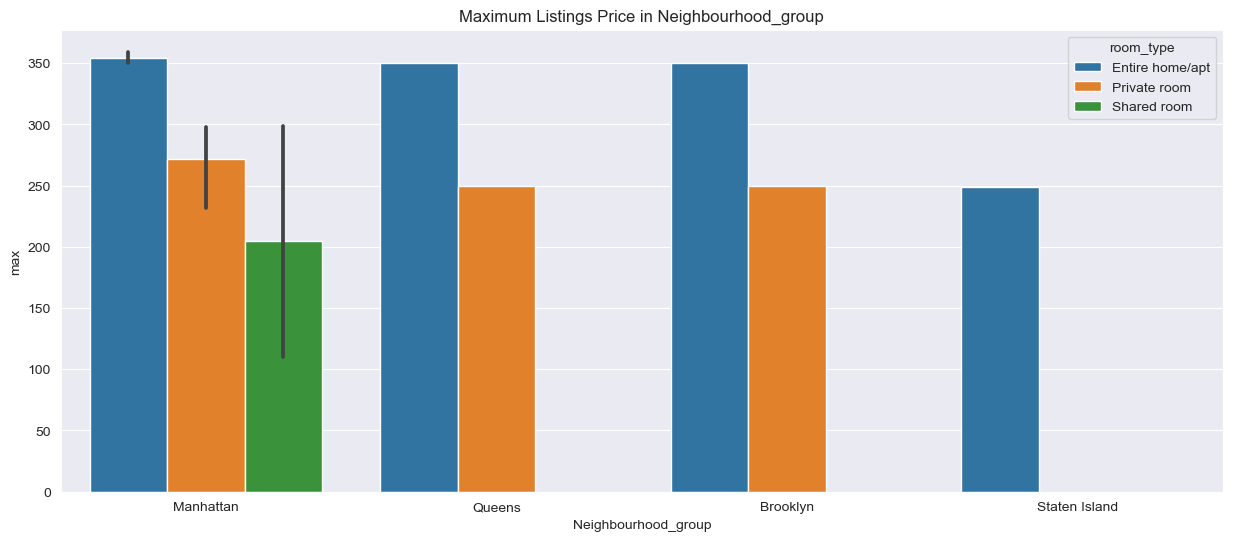

In [40]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(x="neighbourhood_group", y="max", hue="room_type", data=bnb_clean_stat_room_type, ax=ax)
plt.xlabel('Neighbourhood_group')
plt.title('Maximum Listings Price in Neighbourhood_group')
plt.show()

According to the data, the average prices for Airbnb rentals are highest in Manhattan, followed by Brooklyn, Queens, and Staten Island. Among the different room types, the average price for an Entire home/apt is the highest at 365.0, followed by a private room at 300.0 and a shared room at 299.0. These prices are specific to the Manhattan district.

Additionally, in terms of room types, Entire home/apt listings tend to have higher mean prices compared to Private room and Shared room listings. However, there are exceptions, such as some neighborhoods in Manhattan where Private room listings actually have higher starting prices compared to Entire home/apt listings.

It's also worth noting that the West Village neighborhood in Manhattan has the highest mean price for Shared room listings.

These insights provide a more detailed view of the mean prices in different neighborhoods and room types and shows the variation in prices across neighborhood groups.

### Prepare Data for Prediction

In [41]:
def data_preprocessing(bnb_clean):
    # Select numerical values
    numcols = bnb_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']]
    
    # Impute missing values with mean 
    fill_mean = lambda col: col.fillna(col.mean())
    numcols = numcols.apply(fill_mean, axis=0)
    
    # Select categorical features 
    cat_cols = bnb_clean[['neighbourhood_group', 'neighbourhood', 'room_type'] ]
    
    # Create dummy columns for all categorical variables
    cat_cols = pd.get_dummies(cat_cols, dummy_na=False, drop_first=True)
    
    # Merge numerical and categorical features to one matrix
    X = pd.concat([numcols, cat_cols], axis=1)
    
    # Create y as Price column
    y = bnb_clean['price']
    
    return X, y

# Use the function to create X and y
X, y = data_preprocessing(bnb_clean)

print(X)
print(y)


       price  minimum_nights  number_of_reviews  reviews_per_month  \
0        149               1                  9               0.21   
1        225               1                 45               0.38   
2        150               3                  0               0.00   
5        200               3                 74               0.59   
10       135               5                 53               0.43   
...      ...             ...                ...                ...   
48889     65               1                  0               0.00   
48890     70               2                  0               0.00   
48891     40               4                  0               0.00   
48893     55               1                  0               0.00   
48894     90               7                  0               0.00   

       availability_365  neighbourhood_group_Brooklyn  \
0                   365                          True   
1                   355                      

### Model the Data

To predict prices, we will utilize a form of supervised learning known as regression analysis. Specifically, we will employ Ordinary Least Squares Linear Regression, which involves fitting a linear line to the dependent variable, price, based on other independent variables, known as input variables.

The selection of input variables will be guided by both Bivariate Analysis and Univariate Analysis techniques i used above, which help identify the most relevant features to include in the model. By utilizing these methods, we aim to find the optimal combination of variables that will yield the best fit for predicting prices accurately.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


In [43]:
# Normalize the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [44]:
# print proportions of X

total_samples = len(X)
train_samples = len(X_train)
test_samples = len(X_test)

print(f"Total samples: {total_samples}")
print(f"Train samples: {train_samples} ({train_samples/total_samples*100:.2f}%)")
print(f"Test samples: {test_samples} ({test_samples/total_samples*100:.2f}%)")


Total samples: 21458
Train samples: 17166 (80.00%)
Test samples: 4292 (20.00%)


In [45]:
# print proportions of Y

total_samples = len(y)
train_samples = len(y_train)
test_samples = len(y_test)

print(f"Total samples: {total_samples}")
print(f"Train samples: {train_samples} ({train_samples/total_samples*100:.2f}%)")
print(f"Test samples: {test_samples} ({test_samples/total_samples*100:.2f}%)")

Total samples: 21458
Train samples: 17166 (80.00%)
Test samples: 4292 (20.00%)


In [82]:
# Initialization of Linear Regression and training  
lm_model = LinearRegression()  
lm_model.fit(X_train, y_train)  

LinearRegression()

### Evaluate and Result of the Model

To assess the performance of the model, I will utilize two metrics: Mean Squared Error (MSE) and R-squared.

MSE measures the average of the squared differences between the predicted values and the actual values. A higher MSE implies a larger variance or bias in the model. This metric is particularly valuable for comparing different models and can aid in fine-tuning model parameters.

On the other hand, R-squared gauges how well the data points align with the regression line. Ranging from 0 to 1, a higher R-squared suggests that the line accurately describes the relationship between the input (x) and output (y) variables, while a lower value indicates a poor fit. R-squared is a useful metric for overall model evaluation.

In [47]:
from sklearn.metrics import mean_squared_error

def return_metrics_as_table(mse, r_score, set_name):
    
# INPUT
# mse - Mean Squared Error (MSE)
# r_score - R-squared 
# set_name - kind of the input data (training/test)
    
# OUTPUT
# formatted table with metrics
       
    
    print(set_name)
    bnb = pd.DataFrame({'Metric': ['Mean Squared Error', 'R-squared'],
                          'Value': [mse, r_score]})
    print(bnb)


In [48]:
def calculate_metrics(X, y, model):
    
# INPUT:
# X - Feature Matrix
# Y - response variable
# Model - Trained model
    
# OUTPUT:
# Mean Squared Error (MSE), R-squared, 
# Predicted labels
    
# Perform to calculate metrics
    
    pred = model.predict(X)
    mse = mean_squared_error(y, pred)
    r_score = model.score(X, y)
    return mse, r_score, pred

In [61]:
def return_metrics_visualisation(X, y, model, set_name):
    
# INPUT:
# X - Feature Matrix
# Y - response variable
# Model - Trained model
# set_name - kind of the input data (training/test)
    
# OUTPUT
#Table with calculated metrics and visualisation
    
#bring together metrics and visualisation
    
    mse, r_score, pred = calculate_metrics(X, y, model)
    print(return_metrics_as_table(mse, r_score, set_name))
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.regplot(x=y, y=pred, marker="+").set(title=set_name)



Training
               Metric         Value
0  Mean Squared Error  1.670604e-26
1           R-squared  1.000000e+00
None


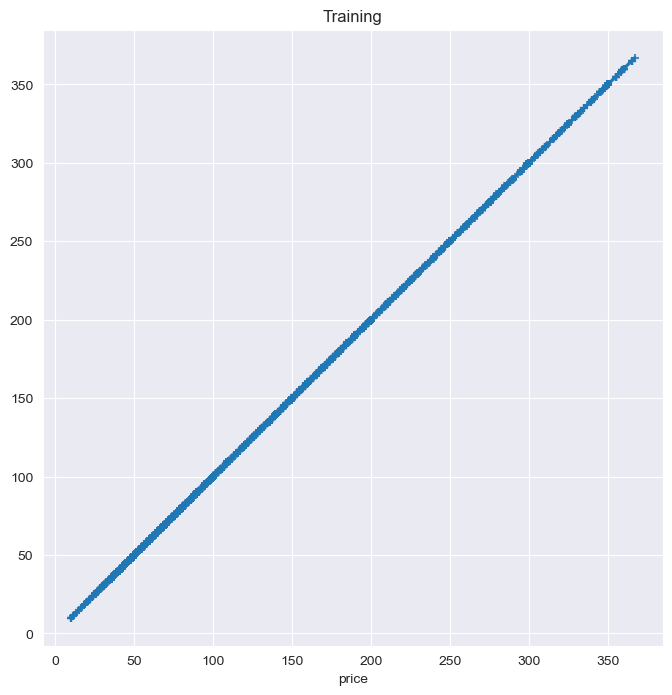

In [62]:
return_metrics_visualisation(X_train, y_train,lm_model, "Training")

Test
               Metric     Value
0  Mean Squared Error  0.165718
1           R-squared  0.999971
None


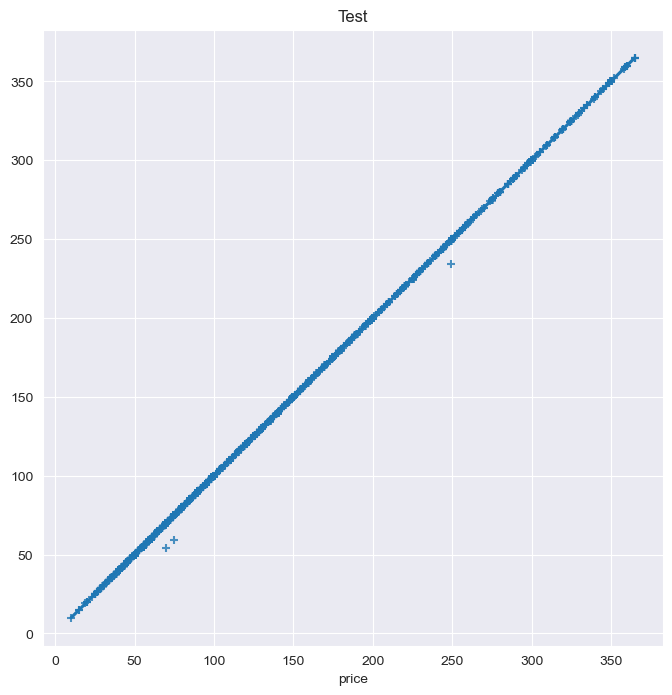

In [63]:
return_metrics_visualisation(X_test, y_test,lm_model, "Test")

From the residual plots, it is evident that the model performs well when predicting lower prices but struggles to accurately predict very high prices.

In comparison, the MSE is very low in both cases, indicating that the model has a very small error when predicting the target variable for both the training and test datasets. This suggests that the model is performing well in terms of accuracy and precision.

The R-squared value is 1.000000e+00, which means that the model explains all the variability in the target variable for both the training and test datasets. This indicates a perfect fit of the model to the data.

Overall, the model appears to generalize well from the training to the test dataset, as the performance metrics are consistent.

# Conclusion 

In NYC, the most common type of listing is the entire home/apartment, followed by private rooms and shared rooms.

The highest price range is observed in entire home/apartment and private rooms, with prices ranging from approximately 70.0 to 365.0. Despite this, the analysis indicates that entire home/apartment are more preferred compared to other room type. The demand remains high, especially in expensive areas with high rental prices.

Manhattan has the highest number of listings, followed by Brooklyn, Queens, Bronx, and Staten Island.

Prices of listings differ across different regions, with some regions having higher average prices compared to others.

The average availability of listings in terms of days varies across neighborhoods. Further analysis is needed to understand the demand and supply dynamics in different neighborhoods.

There doesn't seem to be a strong correlation between the price of listings and the number of reviews.


Although the rental price prediction model yields good results, it still struggles to accurately predict higher prices for lower-priced listings. Hence, further experimentation and analysis should be conducted to improve the model's performance in this aspect.
